<a href="https://colab.research.google.com/github/Arpan-Maity032/Machine-Learning-project/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
!pip install yfinance

In [2]:
import yfinance as yfn
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2023, 12, 31)

df=yfn.download('AAPL',start=start,end=end)
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447412  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458560  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355826  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344076  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386254  7.570714  7.571429  7.466429  7.510714  447610800


In [3]:
df=df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447412,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06,6.355826,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07,6.344076,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


In [4]:
df.shape

(3522, 7)

In [5]:
df=df.drop(["Date","Adj Close"],axis=1)
df.head()

<ipython-input-5-a617dd83abe5>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(["Date","Adj Close"],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


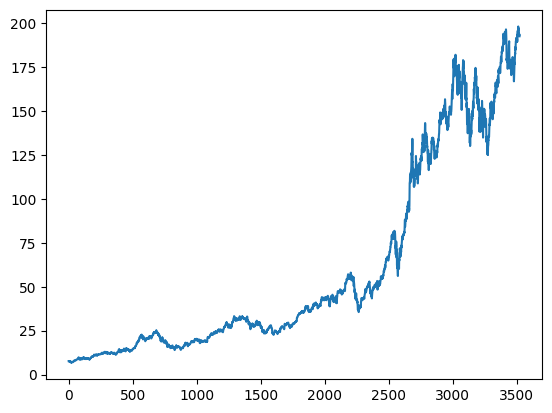

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3517,181.768301
3518,181.787101
3519,181.898701
3520,182.046001


In [8]:
ma200=df.Close.rolling(200).mean()

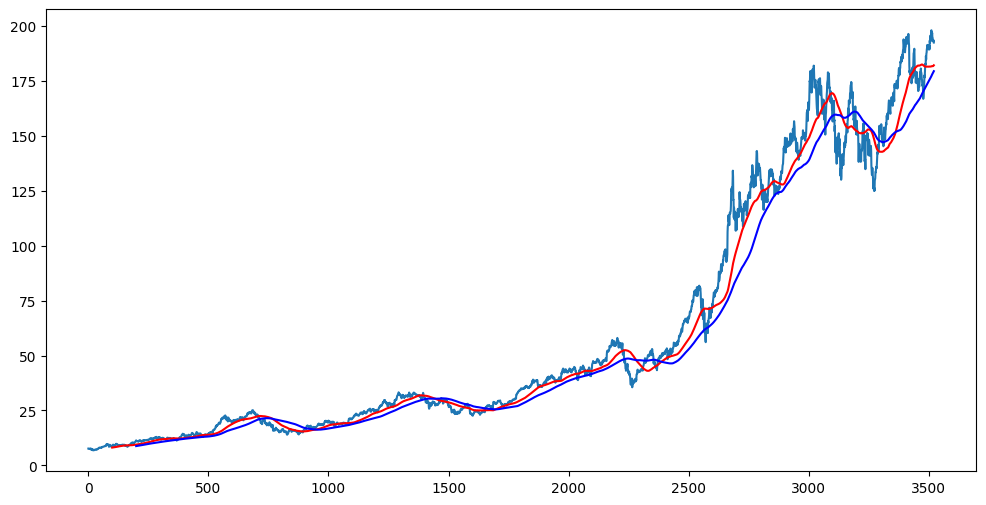

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'b')

In [10]:
df.shape

(3522, 5)

In [11]:
training_data=pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
testing_data=pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

In [12]:
print(training_data.shape)
print(testing_data.shape)

(2465, 1)
(1057, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
training_data_array=scaler.fit_transform(training_data)

In [15]:
training_data_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [16]:
k=training_data_array.shape[0]

In [17]:
x_train=[]
y_train=[]

for i in range(100,k):
    x_train.append(training_data_array[i-100:i])
    y_train.append(training_data_array[i,0])

In [18]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [23]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - loss: 0.0814
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 24s 319ms/step - loss: 0.0083
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0067
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 23s 308ms/step - loss: 0.0065
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 320ms/step - loss: 0.0057
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - loss: 0.0051
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - loss: 0.0047
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0046
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - loss: 0.0039
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 295ms/step - loss: 0.0042
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 24s 323ms/step - loss: 0.0043
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 349ms/step - loss: 0.0036
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s 324ms/step - loss: 0.0033
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 322ms/step - loss: 0.0037
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [26]:
model.save('keras_model.h5')

In [30]:
training_data_100=training_data.tail(100)
training_data_100

Ticker,AAPL
2365,44.345001
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
...,...
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499


In [31]:
final_data = pd.concat([training_data_100, testing_data], ignore_index=True)

In [32]:
final_data.shape

(1157, 1)

In [35]:
final_data.head()

Ticker,AAPL
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [36]:
input_data=scaler.fit_transform(final_data)

In [37]:
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [38]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [39]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [40]:
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [41]:
y_predict=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step


In [42]:
y_predict.shape

(1057, 1)

In [43]:
y_predict

array([[0.12699144],
       [0.12819435],
       [0.12947991],
       ...,
       [0.91821283],
       [0.91434455],
       [0.91025037]], dtype=float32)

In [45]:
scaler.scale_

array([0.00646057])

In [47]:
scale_factor=1/0.00646057
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

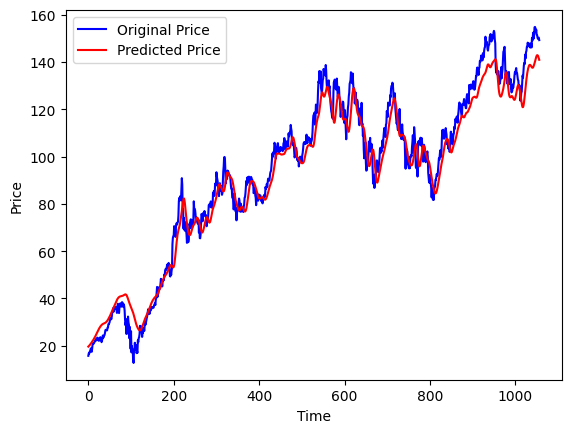

In [48]:
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()